<a href="https://colab.research.google.com/github/prabhat-parth/Real-time-heterogeneity-activity-recognition/blob/master/HETRO_PHONE_GYRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

2.2.0-rc2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/HETRO_DATA/Activity recognition exp/Activity recognition exp/Phones_gyroscope.csv")
data.head()
data.shape


(13932632, 10)

In [0]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))


No of duplicates in DATA: 0


In [0]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 1869627 NaN/Null values in data


In [0]:
#sns.heatmap(data.isnull(), cbar=False)

In [0]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace= True)

In [0]:
#sns.heatmap(data.isnull(), cbar=False)

In [0]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))
data.shape

We have 0 NaN/Null values in data


(12063005, 10)

In [0]:
#data = data.drop(['Arrival_Time'], axis = 1).copy()
data.shape

(12063005, 10)

In [0]:
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,a,nexus4,nexus4_1,stand
4,4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,a,nexus4,nexus4_1,stand


In [0]:
#data = data.drop(['Index','Creation_Time','User','Model','Device'], axis = 1).copy()
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,a,nexus4,nexus4_1,stand
4,4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,a,nexus4,nexus4_1,stand


In [0]:
data['gt'].value_counts()

walk          2350429
sit           2218501
stand         2024206
bike          1911730
stairsup      1884306
stairsdown    1673833
Name: gt, dtype: int64

In [0]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12063005 entries, 0 to 13932631
Data columns (total 10 columns):
Index            int64
Arrival_Time     int64
Creation_Time    int64
x                float64
y                float64
z                float64
User             object
Model            object
Device           object
gt               object
dtypes: float64(3), int64(3), object(4)
memory usage: 1012.4+ MB


(12063005, 10)

In [0]:
Fs = 20
gt= data['gt'].value_counts().index
gt

Index(['walk', 'sit', 'stand', 'bike', 'stairsup', 'stairsdown'], dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label'] = label.fit_transform(data['gt'])
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt,label
0,0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,a,nexus4,nexus4_1,stand,4
1,1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,a,nexus4,nexus4_1,stand,4
2,2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,a,nexus4,nexus4_1,stand,4
3,3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,a,nexus4,nexus4_1,stand,4
4,4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,a,nexus4,nexus4_1,stand,4


In [0]:
label.classes_

array(['bike', 'sit', 'stairsdown', 'stairsup', 'stand', 'walk'],
      dtype=object)

In [0]:
X = data[['x', 'y', 'z']]
y = data['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.019706,0.021055,-0.023556,4
1,0.022037,0.018703,-0.021469,4
2,0.024369,0.018703,-0.019383,4
3,0.026701,0.013998,-0.017296,4
4,0.024369,0.006941,-0.017296,4
...,...,...,...,...
12063000,-0.112567,0.766090,0.285217,0
12063001,-0.267023,0.510861,0.279498,0
12063002,-0.398044,0.146018,0.208002,0
12063003,-0.436391,-0.251602,0.145562,0


In [0]:
label.classes_

array(['bike', 'sit', 'stairsdown', 'stairsup', 'stand', 'walk'],
      dtype=object)

In [0]:
Fs = 50
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40


In [0]:
import math as m
def get_frames(data, frame_size, hop_size):

  N_FEATURES = 3
  frames = []
  labels = []
  for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = data['x'].values[i: i + frame_size]
    y = data['y'].values[i: i + frame_size]
    z = data['z'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x, y, z])
    labels.append(label)
  # Bring the segments into a better shape
  frames = np.asarray(frames, dtype= np.float32).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(labels)
  return frames, labels


In [0]:
X,y = get_frames(scaled_X, frame_size, hop_size)

In [0]:
X.shape
y.shape

(120629,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)


In [0]:
X_train.shape, X_test.shape

((96503, 200, 3), (24126, 200, 3))

In [0]:
X_train = X_train.reshape(96503, 200, 3,1)
X_test = X_test.reshape(24126, 200, 3,1)
X_train[0].shape, X_test[0].shape

((200, 3, 1), (200, 3, 1))

In [0]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 3, 64)        640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 3, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 1, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         


In [0]:
from keras import optimizers
sgd = optimizers.adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=64, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 96503 samples, validate on 24126 samples
Epoch 1/30





96503/96503 [==============================] - 23s 243us/step - loss: 0.7015 - acc: 0.7020 - val_loss: 0.5284 - val_acc: 0.7926
Epoch 2/30
96503/96503 [==============================] - 9s 98us/step - loss: 0.4789 - acc: 0.7983 - val_loss: 0.4433 - val_acc: 0.8321
Epoch 3/30
96503/96503 [==============================] - 9s 98us/step - loss: 0.4187 - acc: 0.8270 - val_loss: 0.4072 - val_acc: 0.8518
Epoch 4/30
96503/96503 [==============================] - 9s 98us/step - loss: 0.3801 - acc: 0.8438 - val_loss: 0.3742 - val_acc: 0.8607
Epoch 5/30
96503/96503 [==============================] - 9s 98us/step - loss: 0.3541 - acc: 0.8566 - val_loss: 0.3525 - val_acc: 0.8672
Epoch 6/30
96503/96503 [==============================] - 9s 98us/step - loss: 0.3346 - acc: 0.8644 - val_loss: 0.3436 - val_acc: 0.8742
Epoch 7/30
96503/96503 [

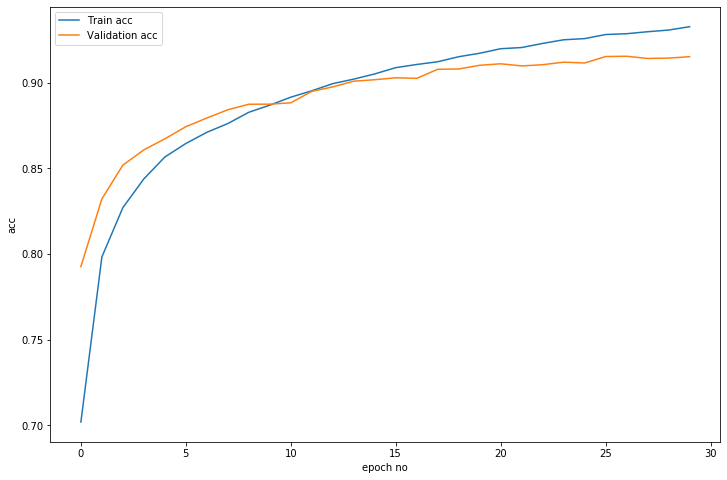

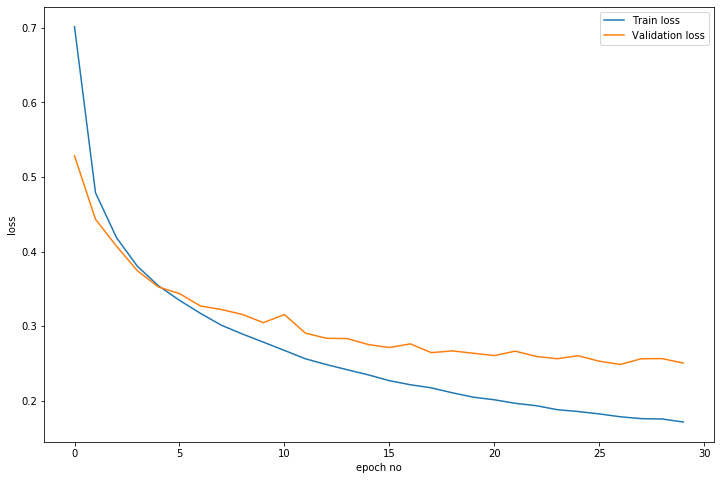

In [0]:
import matplotlib.pyplot as plt1

# Plot training & validation accuracy values
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'],label='Train acc')
plt.plot(history.history['val_acc'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()


[[3629   40   65   50   26   13]
 [  22 3842    5    1  568    0]
 [  19    1 3181  109    0   38]
 [  18    1  105 3626    0   18]
 [  31  710    5    0 3300    3]
 [   7    0  131   63    0 4499]]
0.9150708778910719
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3823
           1       0.84      0.87      0.85      4438
           2       0.91      0.95      0.93      3348
           3       0.94      0.96      0.95      3768
           4       0.85      0.82      0.83      4049
           5       0.98      0.96      0.97      4700

    accuracy                           0.92     24126
   macro avg       0.92      0.92      0.92     24126
weighted avg       0.92      0.92      0.92     24126



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad000837f0>)

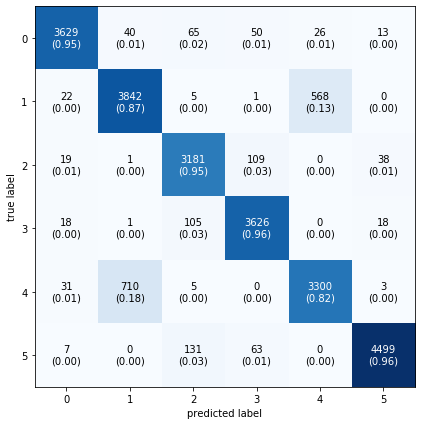

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

fruits = [64,128,256,512,1024]
for x in fruits:
  print(x)

  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))
  model.summary()
  sgd = optimizers.adam(lr=0.0001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=x, verbose=1)  
  y_pred = model.predict_classes(X_test)
  mat = confusion_matrix(y_test, y_pred)
  print(confusion_matrix(y_test, y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))



64
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 3, 64)        640       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 3, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 1, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)             

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

fruits = [0.0001,0.001,0.01,0.1,1.0]
for x in fruits:
  print(x)
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))
  model.summary() 
  sgd = optimizers.adam(lr=x)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=64, verbose=1)  
  y_pred = model.predict_classes(X_test)
  mat = confusion_matrix(y_test, y_pred)
  print(confusion_matrix(y_test, y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))